# Covid 19 forecasting
## Data validation (Daily cases)

In [68]:
import pandas as pd
import numpy as np

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
data_frame=pd.read_csv('confirmed_data.csv')

In [72]:
data_frame.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
2,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
4,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0


In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
stationary_cols=[]
non_stationary_cols=[]

In [75]:
#h0=It is not stationary
#h1=It is stationary
def adfuller_test(data):
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        stationary_cols.append(data.name)
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        non_stationary_cols.append(data.name)

In [76]:
data_frame['TT'].name

'TT'

In [77]:
#adfuller test for total cases
adfuller_test(data_frame['TT'])

test_statistic : -3.1468594460347403
p value : 0.023274189337961524
lags used : 19
number of observations used : 548
---------------------------------------------------
p value 0.023274189337961524
Reject h0
It is stationary
Weak evidence that the given data is not stationary


In [78]:
#adfuller test for the features of different regions
for cols in data_frame.columns[4:]:
    print('Test for ',cols)
    adfuller_test(data_frame[cols])
    print('-------------------------------------------------------------------------------')

Test for  AN
test_statistic : -2.8087708661258772
p value : 0.05703179328098687
lags used : 19
number of observations used : 548
---------------------------------------------------
p value 0.05703179328098687
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  AP
test_statistic : -3.4849434222730764
p value : 0.008382304192044715
lags used : 18
number of observations used : 549
---------------------------------------------------
p value 0.008382304192044715
Reject h0
It is stationary
Weak evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  AR
test_statistic : -2.3121792076882484
p value : 0.16807001702193808
lags used : 19
number of observations used : 548
---------------------------------------------------
p value 0.16807001702193808
Accecpt h0
It is not stationary
Strong evidenc

test_statistic : -2.8278843169579875
p value : 0.05439976068909385
lags used : 18
number of observations used : 549
---------------------------------------------------
p value 0.05439976068909385
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  OR
test_statistic : -4.18293956963297
p value : 0.0007041111670460959
lags used : 19
number of observations used : 548
---------------------------------------------------
p value 0.0007041111670460959
Reject h0
It is stationary
Weak evidence that the given data is not stationary
-------------------------------------------------------------------------------
Test for  PY
test_statistic : -3.270470972438749
p value : 0.016251137755931455
lags used : 17
number of observations used : 550
---------------------------------------------------
p value 0.016251137755931455
Reject h0
It is stationary
Weak evidence that the given da

In [79]:
print(stationary_cols)
print('--------------------------')
print(non_stationary_cols)

['TT', 'AP', 'BR', 'CT', 'DN', 'DL', 'GA', 'GJ', 'HP', 'JK', 'JH', 'KL', 'MP', 'MH', 'OR', 'PY', 'PB', 'RJ', 'TR', 'UP', 'UT', 'WB', 'UN']
--------------------------
['AN', 'AR', 'AS', 'CH', 'DD', 'HR', 'KA', 'LA', 'LD', 'MN', 'ML', 'MZ', 'NL', 'SK', 'TN', 'TG']


In [96]:
#h0=It is not stationary
#h1=It is stationary
def repeat_adfuller_test(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    for lab,val in zip(labels,results[:4]):
        print('{} : {}'.format(lab,val))
    print('---------------------------------------------------')   
    print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    else:
        print('Accecpt h0')
        print(h0)
        print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)
    return cols_after_differencing

Test for  AN
test_statistic : -4.017408942024654
p value : 0.0013220467494446425
lags used : 13
number of observations used : 547
---------------------------------------------------
p value 0.0013220467494446425
Reject h0
It is stationary
Weak evidence that the given data is not stationary


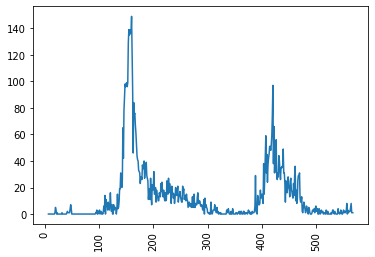

---------------------------------------------------------------------
Test for  AR
test_statistic : -2.2816581179290494
p value : 0.17795184556667337
lags used : 19
number of observations used : 541
---------------------------------------------------
p value 0.17795184556667337
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


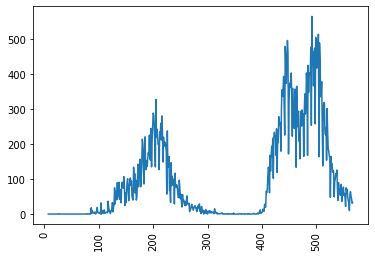

---------------------------------------------------------------------
Test for  AS
test_statistic : -2.8038347608940803
p value : 0.05772808419113569
lags used : 17
number of observations used : 543
---------------------------------------------------
p value 0.05772808419113569
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


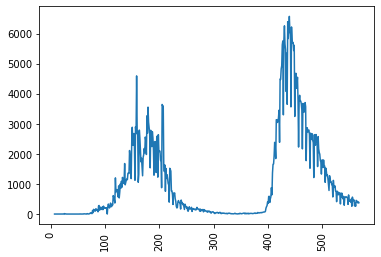

---------------------------------------------------------------------
Test for  CH
test_statistic : -2.5544067106543755
p value : 0.10279127866383292
lags used : 6
number of observations used : 554
---------------------------------------------------
p value 0.10279127866383292
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


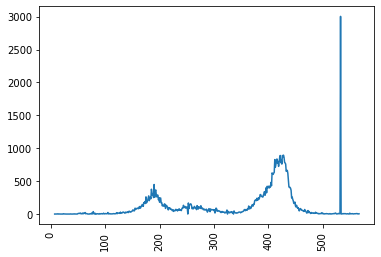

---------------------------------------------------------------------
Test for  DD
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 560
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


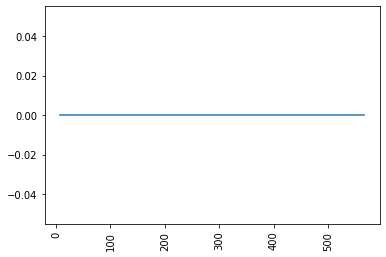

---------------------------------------------------------------------
Test for  HR
test_statistic : -2.671598234701704
p value : 0.07908327555451988
lags used : 17
number of observations used : 543
---------------------------------------------------
p value 0.07908327555451988
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


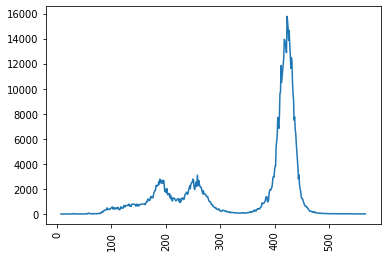

---------------------------------------------------------------------
Test for  KA
test_statistic : -2.829668032720652
p value : 0.05415927370675394
lags used : 19
number of observations used : 541
---------------------------------------------------
p value 0.05415927370675394
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


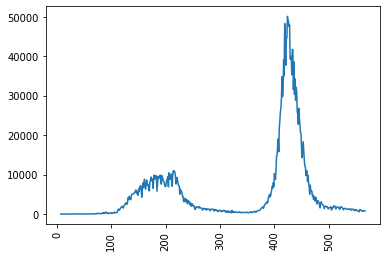

---------------------------------------------------------------------
Test for  LA
test_statistic : -2.3944264050359765
p value : 0.14331569818066298
lags used : 7
number of observations used : 553
---------------------------------------------------
p value 0.14331569818066298
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


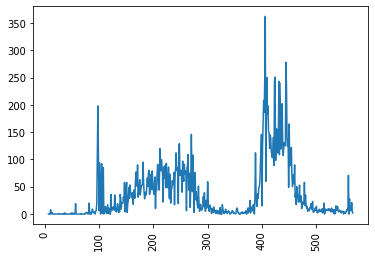

---------------------------------------------------------------------
Test for  LD
test_statistic : -2.4658350532821007
p value : 0.12400982495367402
lags used : 17
number of observations used : 543
---------------------------------------------------
p value 0.12400982495367402
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


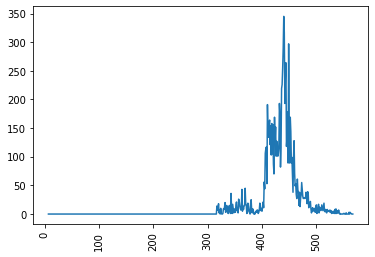

---------------------------------------------------------------------
Test for  MN
test_statistic : -2.3713503194713
p value : 0.14998635275220973
lags used : 17
number of observations used : 543
---------------------------------------------------
p value 0.14998635275220973
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


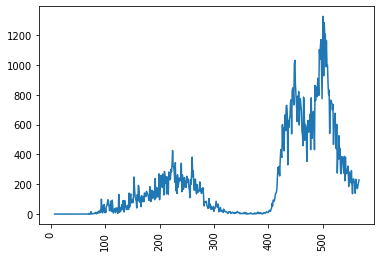

---------------------------------------------------------------------
Test for  ML
test_statistic : -2.0039764703776415
p value : 0.28483228194735805
lags used : 12
number of observations used : 548
---------------------------------------------------
p value 0.28483228194735805
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


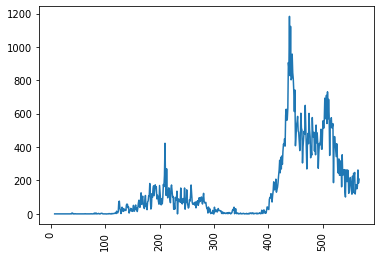

---------------------------------------------------------------------
Test for  MZ
test_statistic : 1.6218041707772037
p value : 0.9979215382132434
lags used : 17
number of observations used : 543
---------------------------------------------------
p value 0.9979215382132434
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


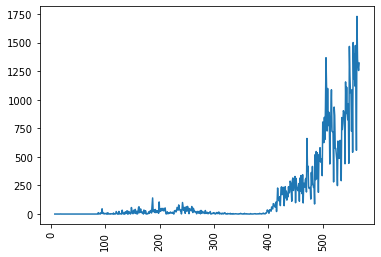

---------------------------------------------------------------------
Test for  NL
test_statistic : -2.829553173641225
p value : 0.05417473322841471
lags used : 18
number of observations used : 542
---------------------------------------------------
p value 0.05417473322841471
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


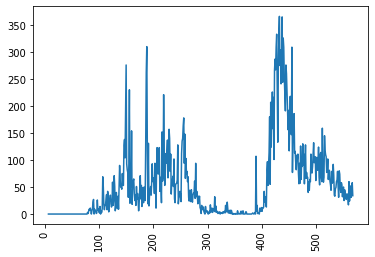

---------------------------------------------------------------------
Test for  SK
test_statistic : -2.2826678693254685
p value : 0.17761887249123626
lags used : 15
number of observations used : 545
---------------------------------------------------
p value 0.17761887249123626
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


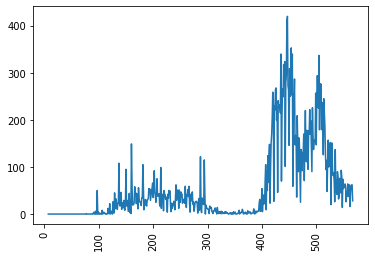

---------------------------------------------------------------------
Test for  TN
test_statistic : -2.690261317315773
p value : 0.07573870070123609
lags used : 18
number of observations used : 542
---------------------------------------------------
p value 0.07573870070123609
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


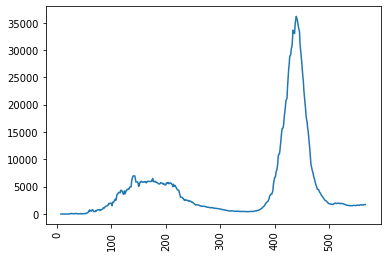

---------------------------------------------------------------------
Test for  TG
test_statistic : -2.751571021232343
p value : 0.06553139860335108
lags used : 18
number of observations used : 542
---------------------------------------------------
p value 0.06553139860335108
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


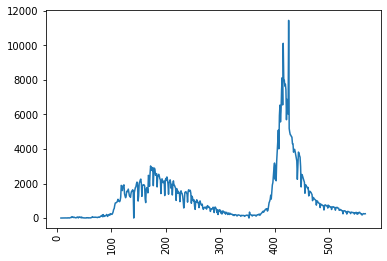

---------------------------------------------------------------------


In [81]:
#repeating adfuller test for the features which are not stationary.
for cols in non_stationary_cols:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(7)
    repeat_adfuller_test(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------------------------------------------------')

In [82]:
from pandas.plotting import autocorrelation_plot

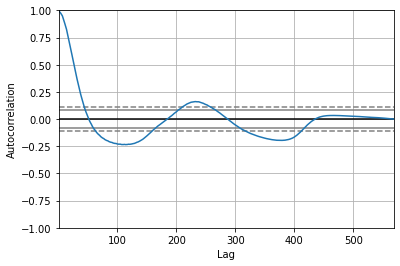

In [83]:
autocorrelation_plot(data_frame['TT']);

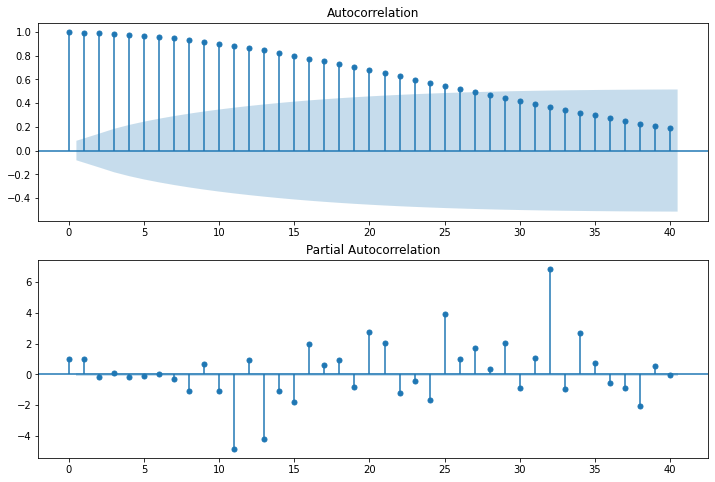

In [136]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data_frame['TT'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data_frame['TT'],lags=40,ax=ax2)

In [85]:
#30 day difference
data=data_frame.copy()

In [86]:
data['new_tt']=data['TT'].shift(7)

In [87]:
data.head(20)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,RJ,SK,TN,TG,TR,UP,UT,WB,UN,new_tt
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,3,0,1,1,0,12,0,0,0,NaN
1,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,1,0,0,2,0,1,0,0,0,NaN
2,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN
3,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,1,0,2,0,1,0,NaN
4,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,3,0,1,8,0,2,1,0,0,NaN
5,19-Mar-20,2020-03-19,Confirmed,27,0,2,0,0,0,1,...,2,0,1,3,0,3,1,0,0,NaN
6,20-Mar-20,2020-03-20,Confirmed,58,0,0,0,0,0,4,...,8,0,0,3,0,4,0,1,0,NaN
7,21-Mar-20,2020-03-21,Confirmed,78,0,2,0,0,0,0,...,7,0,3,2,0,4,0,2,0,81.0
8,22-Mar-20,2020-03-22,Confirmed,67,0,1,0,0,2,1,...,4,0,3,6,0,2,0,3,0,27.0
9,23-Mar-20,2020-03-23,Confirmed,102,0,1,0,0,1,1,...,4,0,3,6,0,2,1,0,0,15.0


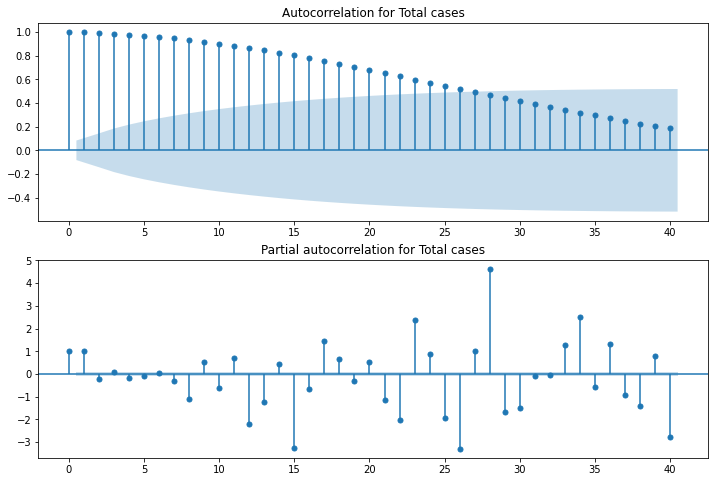

In [88]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['new_tt'].iloc[7:],lags=40,ax=ax1,title='Autocorrelation for Total cases')
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['new_tt'].iloc[7:],lags=40,ax=ax2,title='Partial autocorrelation for Total cases')

In [89]:
short_forms=[]
for i in data_frame.columns[4:]:
    short_forms.append(i)

In [90]:
abbreviations=['Andaman and Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chandigarh','Chhattisgarh',
              'Dadra and Nagar Haveli','Daman and Diu','Delhi','Goa','Gujarat','Haryana',
              'Himachal Pradesh','Jammu and Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Lakshadweep',
              'Madhya Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Orissa','Pondicherry',
              'Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand',
              'West Bengal','Union Territories']

## Plotting all the features of different that are not classified as stationary or non-stationary data.

ACF and PACF for  Andaman and Nicobar Islands


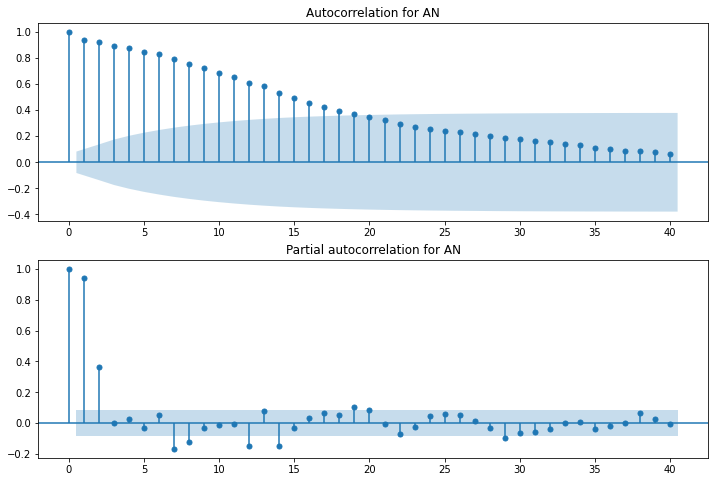

----------------------------------------------------------------------------------------------
ACF and PACF for  Andhra Pradesh


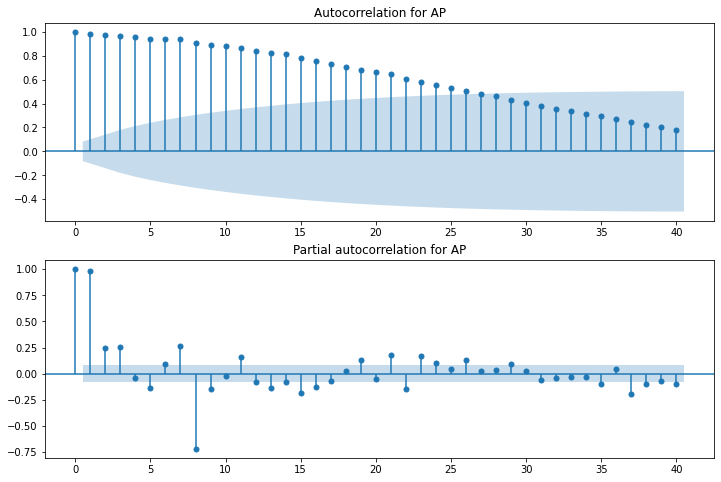

----------------------------------------------------------------------------------------------
ACF and PACF for  Arunachal Pradesh


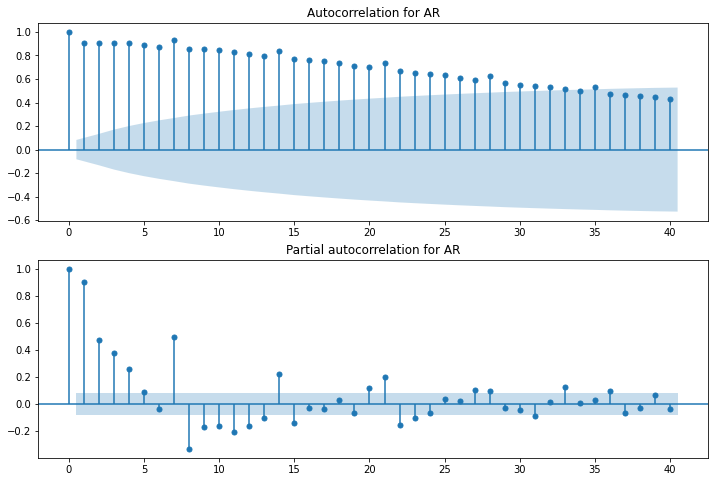

----------------------------------------------------------------------------------------------
ACF and PACF for  Assam


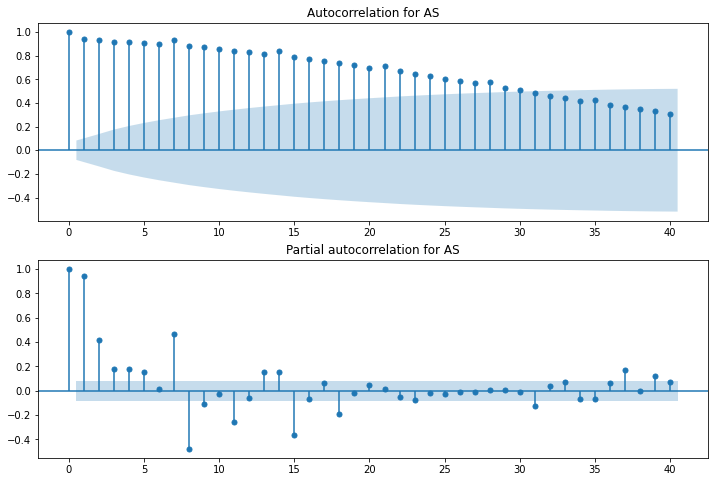

----------------------------------------------------------------------------------------------
ACF and PACF for  Bihar


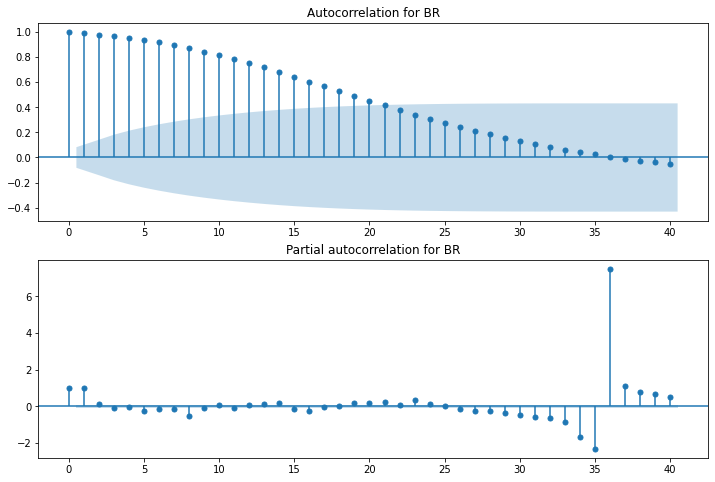

----------------------------------------------------------------------------------------------
ACF and PACF for  Chandigarh


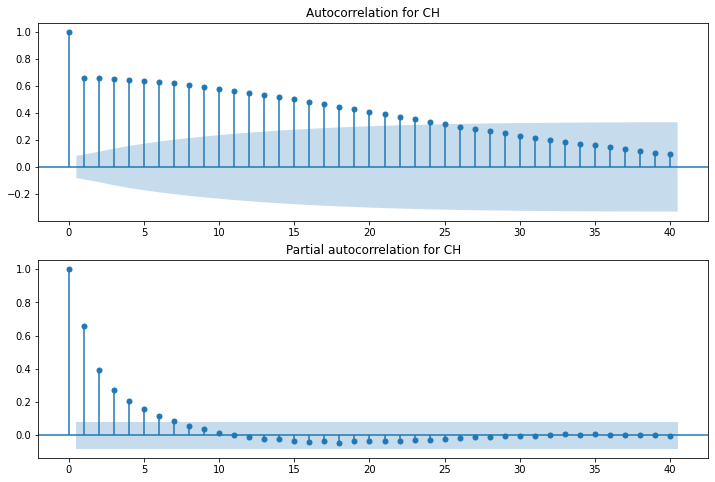

----------------------------------------------------------------------------------------------
ACF and PACF for  Chhattisgarh


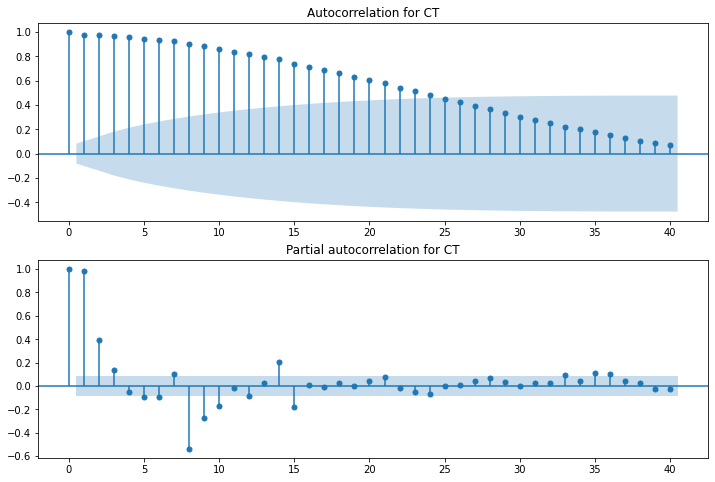

----------------------------------------------------------------------------------------------
ACF and PACF for  Dadra and Nagar Haveli


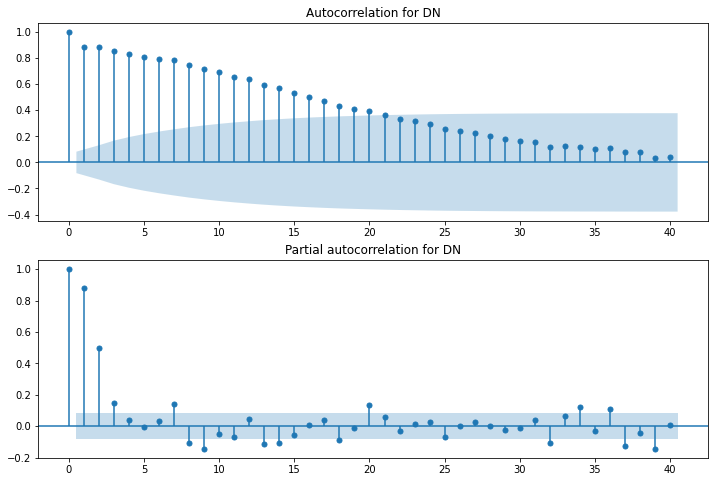

----------------------------------------------------------------------------------------------
ACF and PACF for  Daman and Diu
This feature cannot be plotted for autocorrelation and partial autocorrelation
----------------------------------------------------------------------------------------------
ACF and PACF for  Delhi


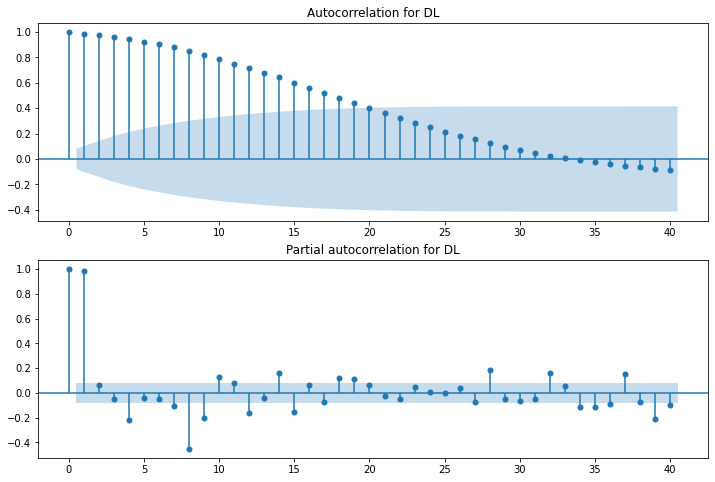

----------------------------------------------------------------------------------------------
ACF and PACF for  Goa


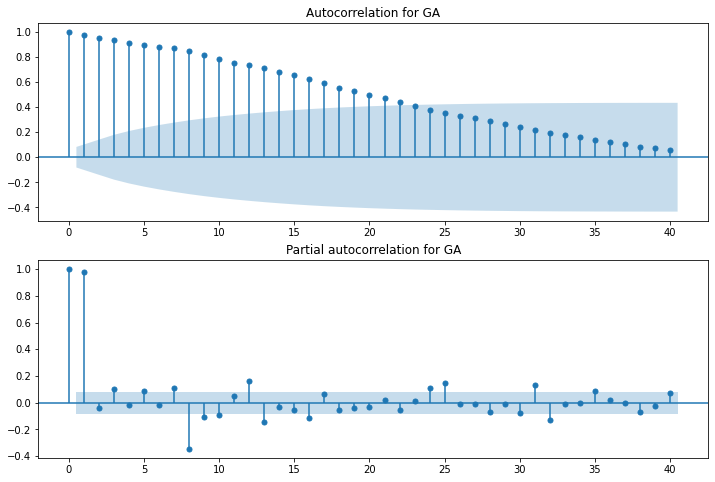

----------------------------------------------------------------------------------------------
ACF and PACF for  Gujarat


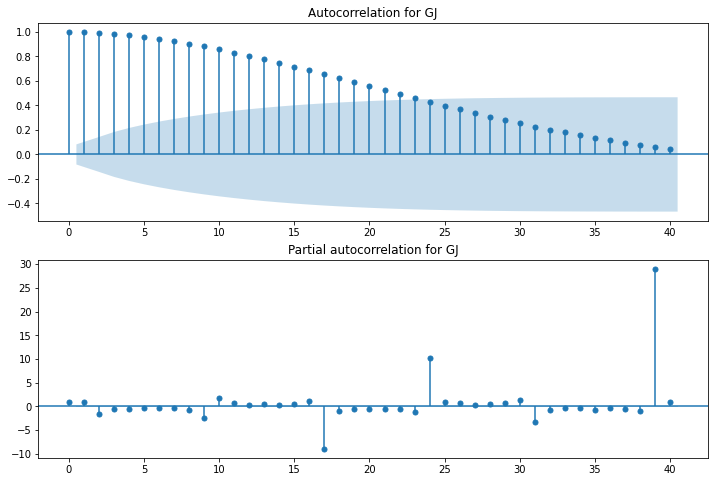

----------------------------------------------------------------------------------------------
ACF and PACF for  Haryana


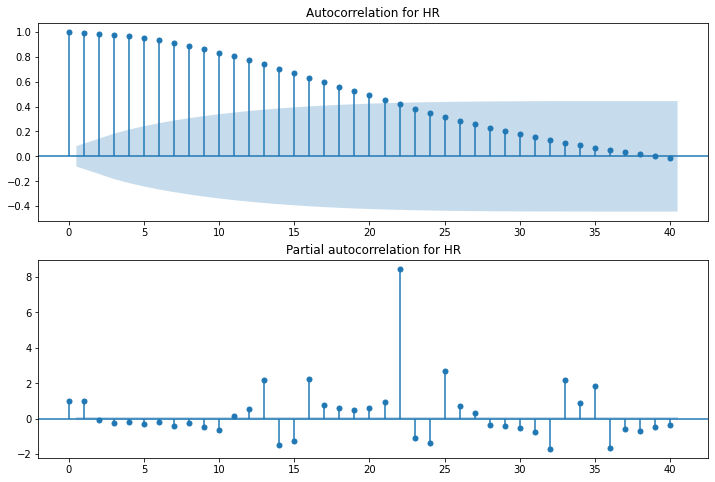

----------------------------------------------------------------------------------------------
ACF and PACF for  Himachal Pradesh


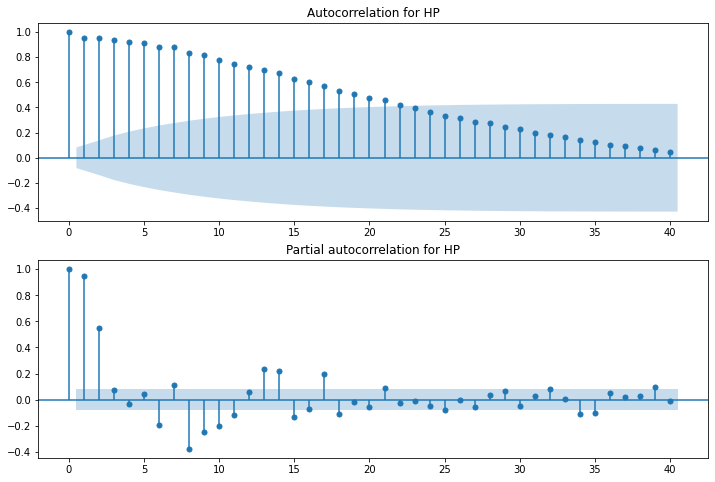

----------------------------------------------------------------------------------------------
ACF and PACF for  Jammu and Kashmir


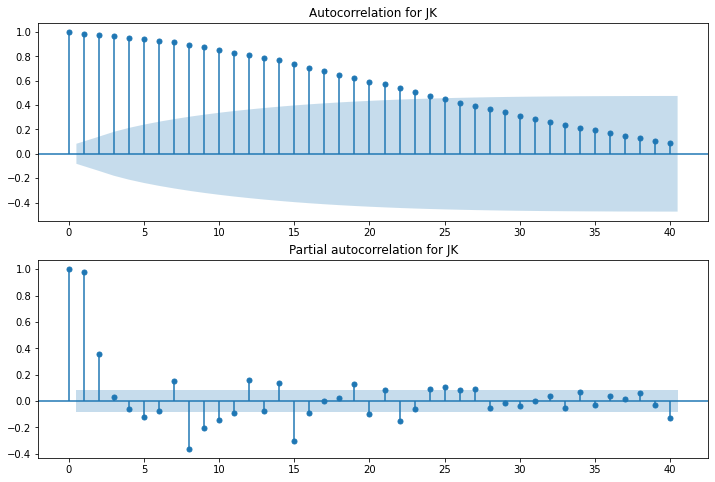

----------------------------------------------------------------------------------------------
ACF and PACF for  Jharkhand


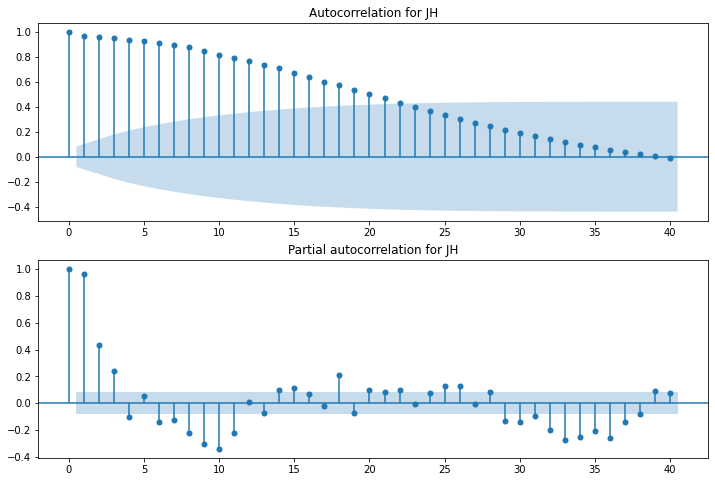

----------------------------------------------------------------------------------------------
ACF and PACF for  Karnataka


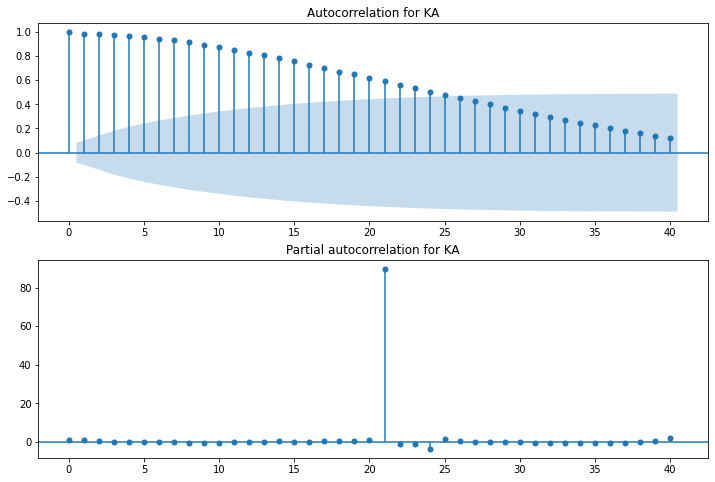

----------------------------------------------------------------------------------------------
ACF and PACF for  Kerala


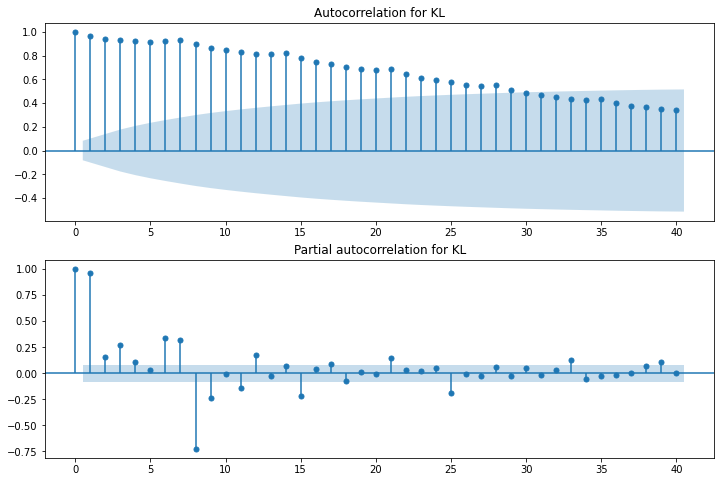

----------------------------------------------------------------------------------------------
ACF and PACF for  Ladakh


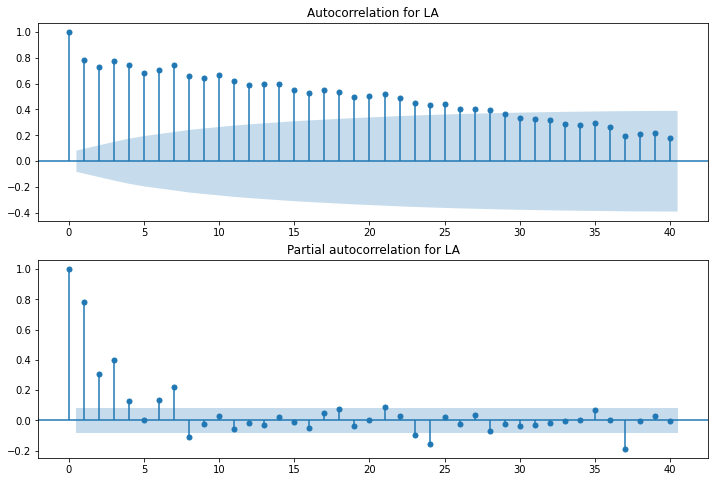

----------------------------------------------------------------------------------------------
ACF and PACF for  Lakshadweep


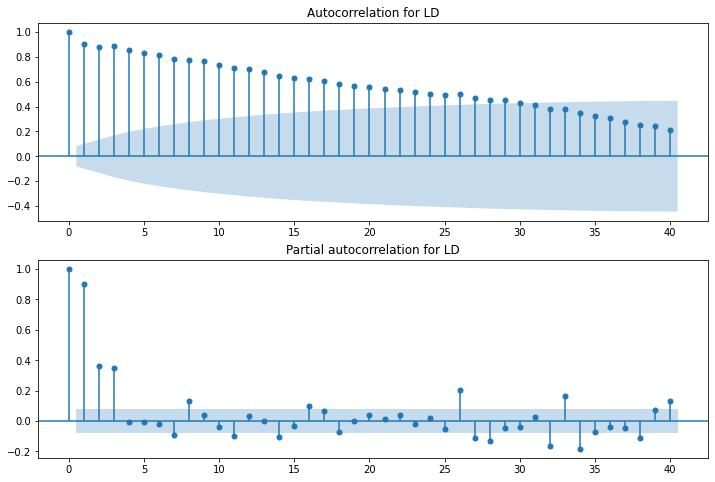

----------------------------------------------------------------------------------------------
ACF and PACF for  Madhya Pradesh


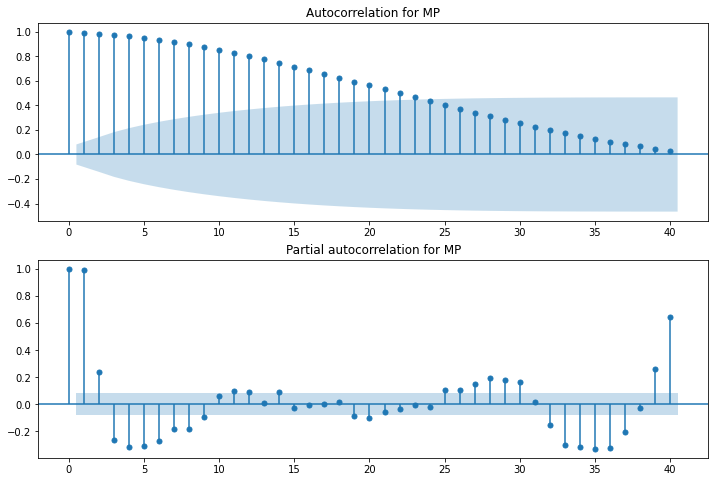

----------------------------------------------------------------------------------------------
ACF and PACF for  Maharashtra


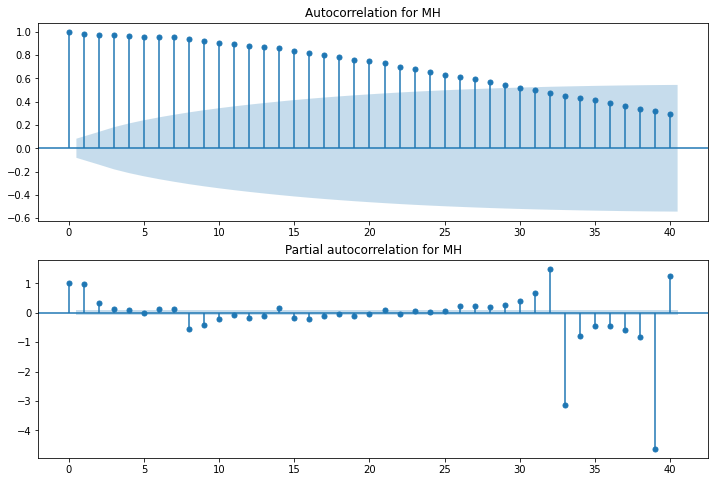

----------------------------------------------------------------------------------------------
ACF and PACF for  Manipur


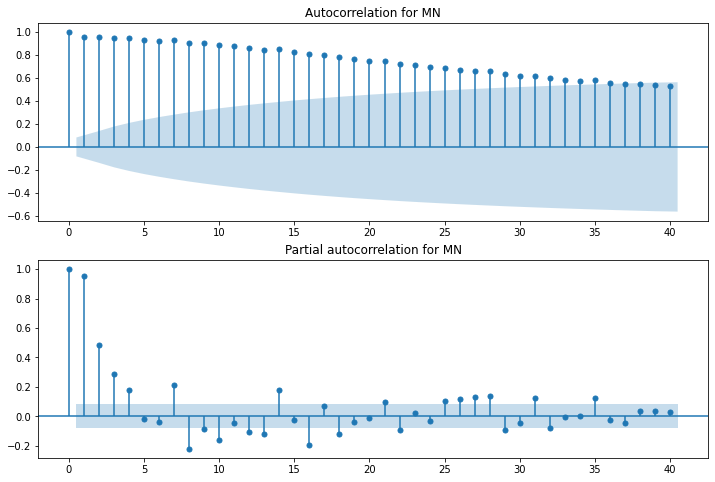

----------------------------------------------------------------------------------------------
ACF and PACF for  Meghalaya


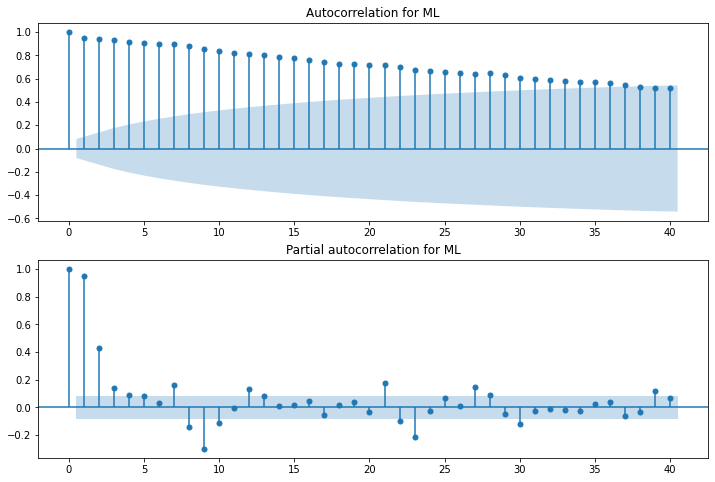

----------------------------------------------------------------------------------------------
ACF and PACF for  Mizoram


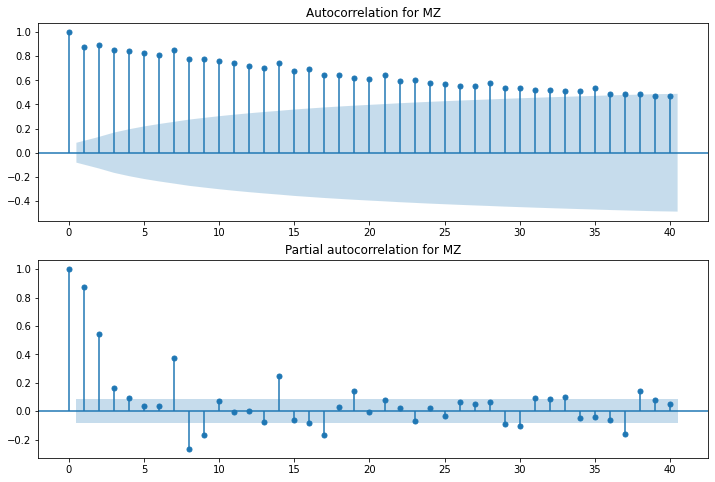

----------------------------------------------------------------------------------------------
ACF and PACF for  Nagaland


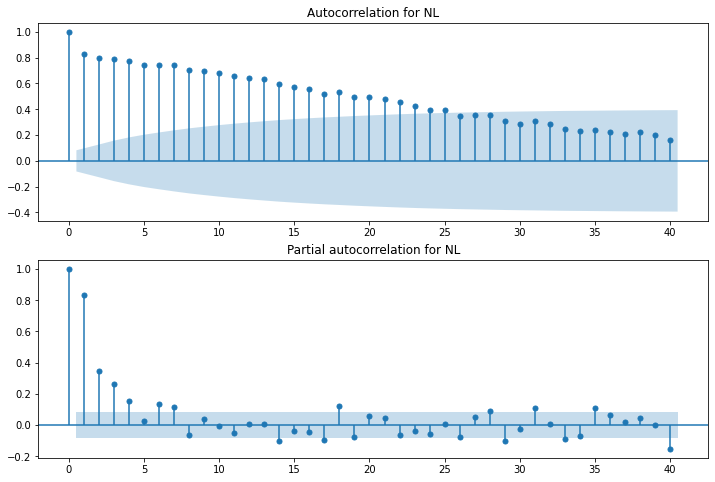

----------------------------------------------------------------------------------------------
ACF and PACF for  Orissa


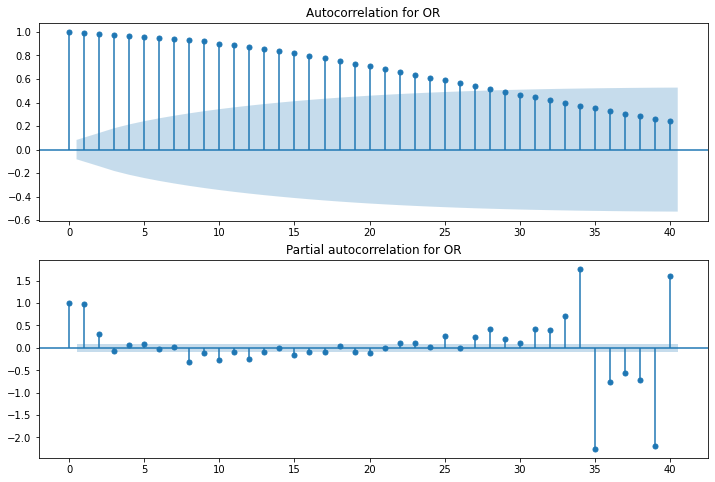

----------------------------------------------------------------------------------------------
ACF and PACF for  Pondicherry


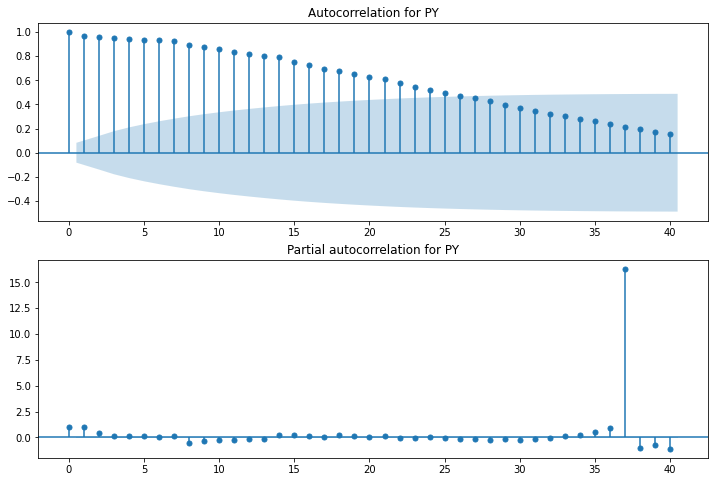

----------------------------------------------------------------------------------------------
ACF and PACF for  Punjab


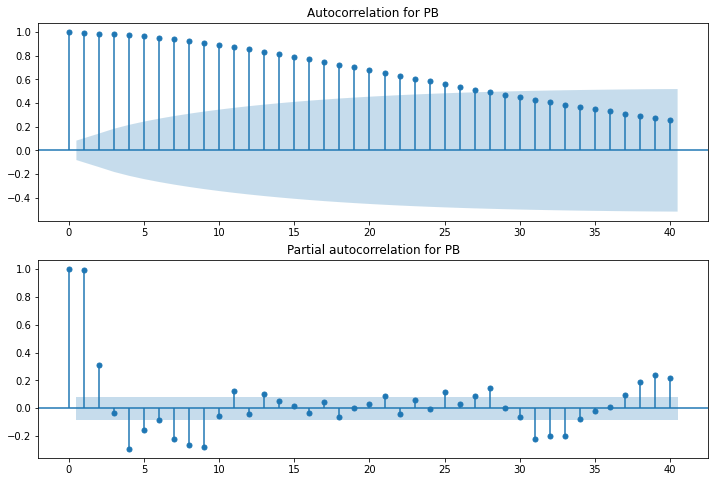

----------------------------------------------------------------------------------------------
ACF and PACF for  Rajasthan


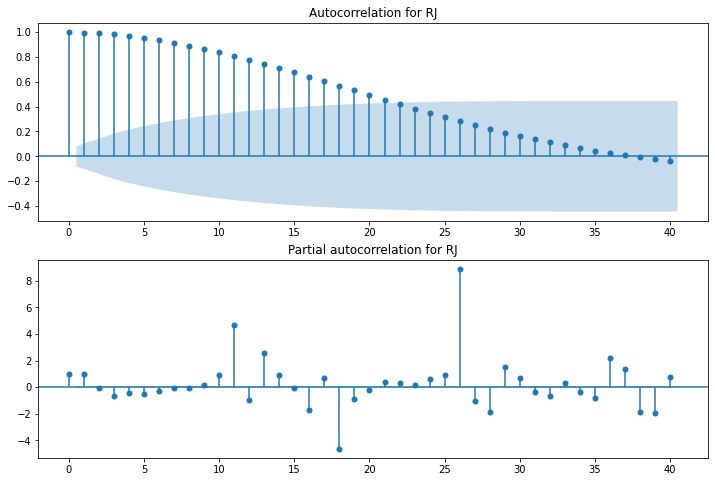

----------------------------------------------------------------------------------------------
ACF and PACF for  Sikkim


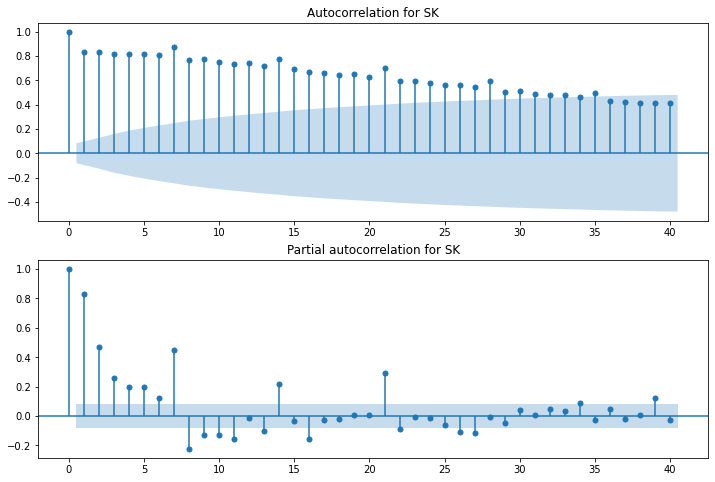

----------------------------------------------------------------------------------------------
ACF and PACF for  Tamil Nadu


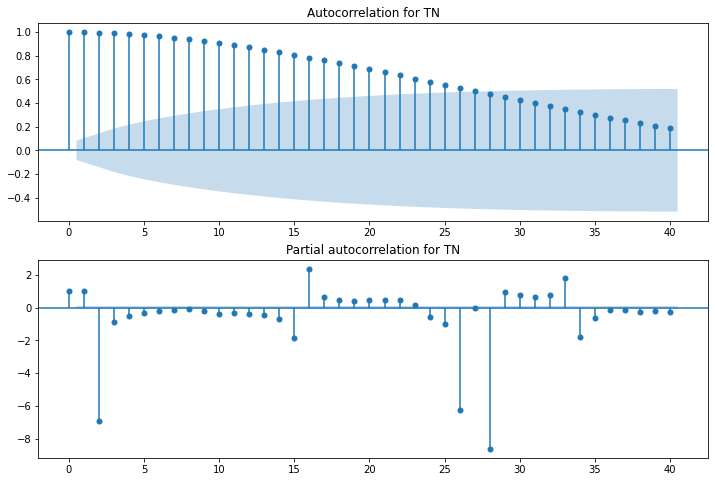

----------------------------------------------------------------------------------------------
ACF and PACF for  Telangana


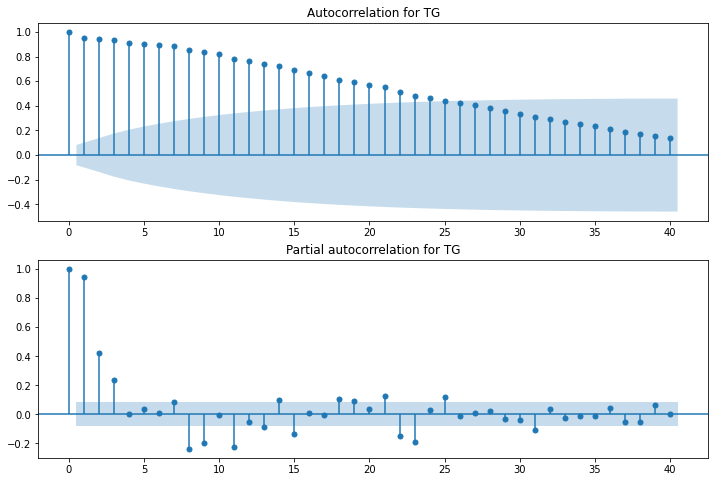

----------------------------------------------------------------------------------------------
ACF and PACF for  Tripura


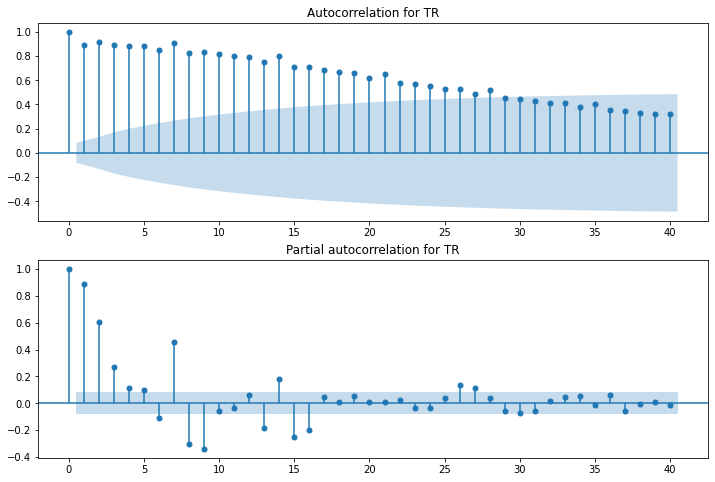

----------------------------------------------------------------------------------------------
ACF and PACF for  Uttar Pradesh


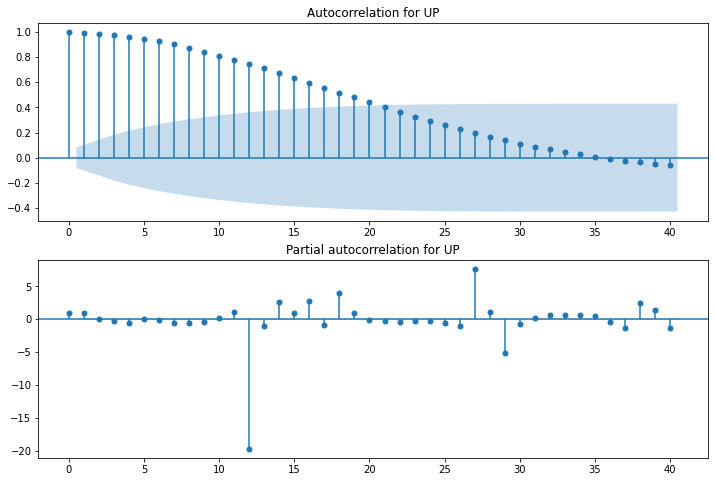

----------------------------------------------------------------------------------------------
ACF and PACF for  Uttarakhand


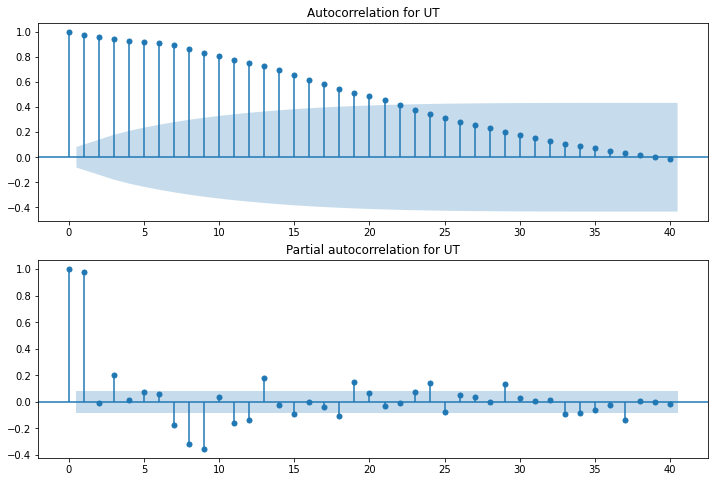

----------------------------------------------------------------------------------------------
ACF and PACF for  West Bengal


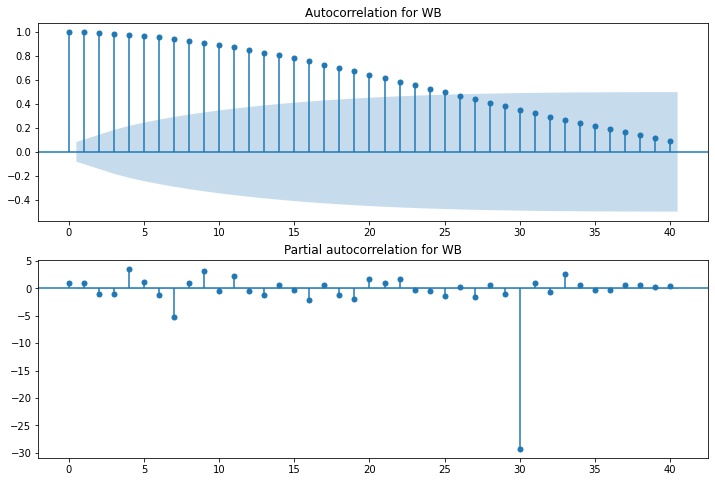

----------------------------------------------------------------------------------------------
ACF and PACF for  Union Territories


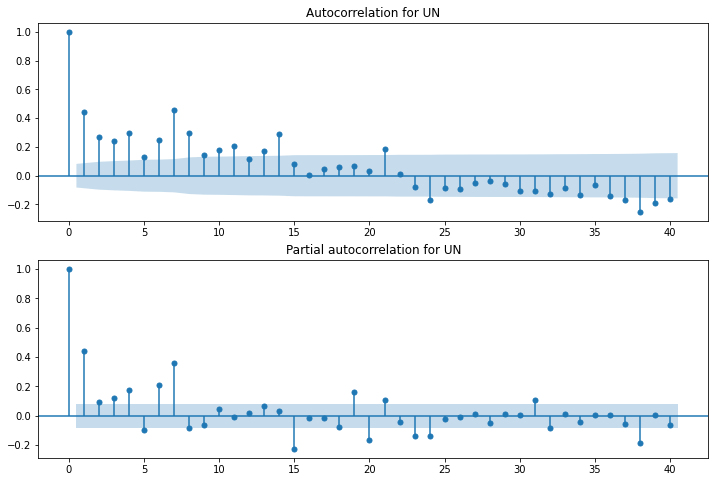

----------------------------------------------------------------------------------------------


In [91]:
#plotting acf and pacf plots for region or state columns
for i in range(0,len(short_forms)):
    print('ACF and PACF for ',abbreviations[i])
    if short_forms[i]!='DD':
        cols=short_forms[i]
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(data_frame[cols],lags=40,ax=ax1,title='Autocorrelation for '+cols)
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(data_frame[cols],lags=40,ax=ax2,title='Partial autocorrelation for '+cols)
        
        plt.show()
        
    else:
        #'DD' feature cannot be plotted for acf and pacf due to the inconsistent values in it. It does not contain any value to plot
        print('This feature cannot be plotted for autocorrelation and partial autocorrelation')
    print('----------------------------------------------------------------------------------------------')

## Differencing the data and repeating the adfuller test for the features which are not stationary.

Test for  AN
test_statistic : -3.9458515991807697
p value : 0.0017221551580473506
lags used : 13
number of observations used : 514
---------------------------------------------------
p value 0.0017221551580473506
Reject h0
It is stationary
Weak evidence that the given data is not stationary


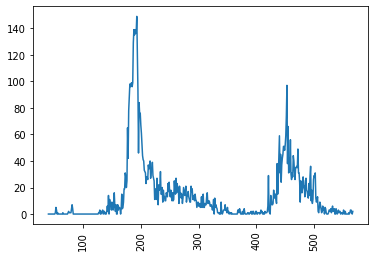

---------------------------------------------------------------------
Test for  AR
test_statistic : -2.2410052407573775
p value : 0.19170080852242855
lags used : 19
number of observations used : 508
---------------------------------------------------
p value 0.19170080852242855
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


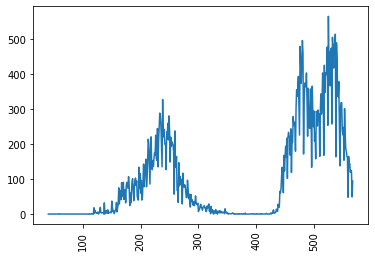

---------------------------------------------------------------------
Test for  AS
test_statistic : -2.7337927938820092
p value : 0.06837095122077387
lags used : 17
number of observations used : 510
---------------------------------------------------
p value 0.06837095122077387
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


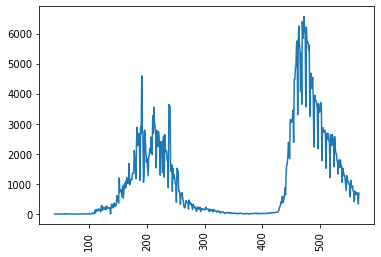

---------------------------------------------------------------------
Test for  CH
test_statistic : -1.1539987605910464
p value : 0.6930648959676213
lags used : 1
number of observations used : 526
---------------------------------------------------
p value 0.6930648959676213
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


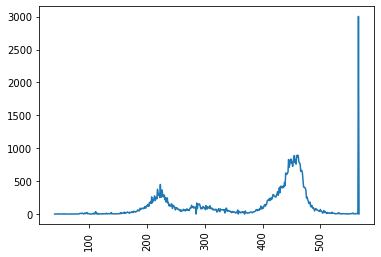

---------------------------------------------------------------------
Test for  DD
test_statistic : nan
p value : nan
lags used : 0
number of observations used : 527
---------------------------------------------------
p value nan
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


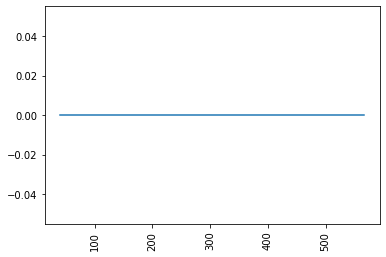

---------------------------------------------------------------------
Test for  HR
test_statistic : -2.620420155065561
p value : 0.08884985101388115
lags used : 17
number of observations used : 510
---------------------------------------------------
p value 0.08884985101388115
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


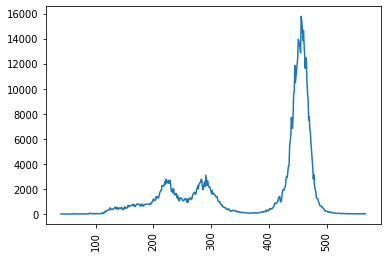

---------------------------------------------------------------------
Test for  KA
test_statistic : -2.774249163418428
p value : 0.06204727879364543
lags used : 19
number of observations used : 508
---------------------------------------------------
p value 0.06204727879364543
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


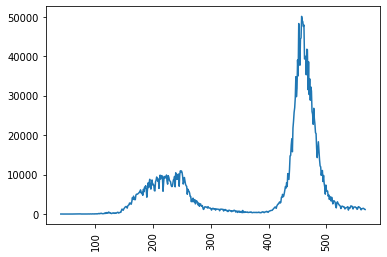

---------------------------------------------------------------------
Test for  LA
test_statistic : -2.339924469622846
p value : 0.1594145511989794
lags used : 7
number of observations used : 520
---------------------------------------------------
p value 0.1594145511989794
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


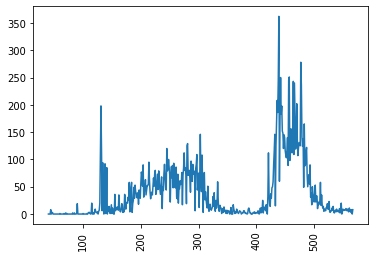

---------------------------------------------------------------------
Test for  LD
test_statistic : -2.4069416151897927
p value : 0.139786766817243
lags used : 17
number of observations used : 510
---------------------------------------------------
p value 0.139786766817243
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


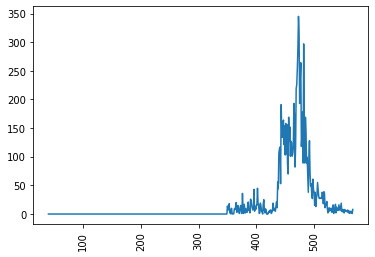

---------------------------------------------------------------------
Test for  MN
test_statistic : -2.392187013190702
p value : 0.14395372011802215
lags used : 17
number of observations used : 510
---------------------------------------------------
p value 0.14395372011802215
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


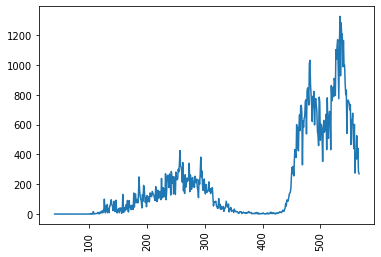

---------------------------------------------------------------------
Test for  ML
test_statistic : -1.8597318510930918
p value : 0.3512350280082115
lags used : 12
number of observations used : 515
---------------------------------------------------
p value 0.3512350280082115
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


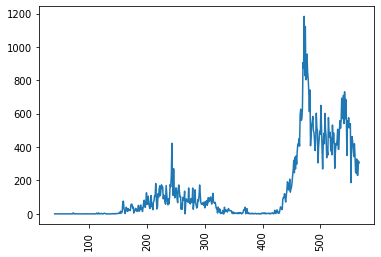

---------------------------------------------------------------------
Test for  MZ
test_statistic : -1.7711633614066775
p value : 0.39486931518307655
lags used : 19
number of observations used : 508
---------------------------------------------------
p value 0.39486931518307655
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


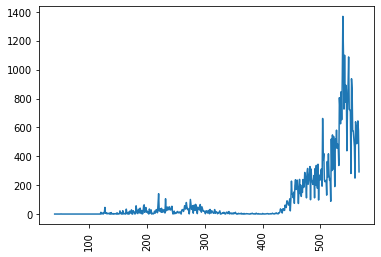

---------------------------------------------------------------------
Test for  NL
test_statistic : -2.753563204851933
p value : 0.06521918060469799
lags used : 18
number of observations used : 509
---------------------------------------------------
p value 0.06521918060469799
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


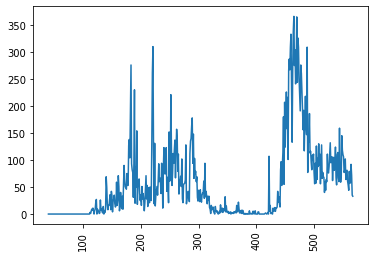

---------------------------------------------------------------------
Test for  SK
test_statistic : -2.206008954549532
p value : 0.20407178626878925
lags used : 15
number of observations used : 512
---------------------------------------------------
p value 0.20407178626878925
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


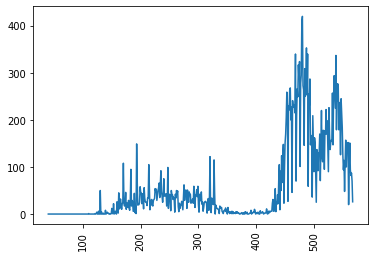

---------------------------------------------------------------------
Test for  TN
test_statistic : -2.6210162820203093
p value : 0.08873095546022858
lags used : 18
number of observations used : 509
---------------------------------------------------
p value 0.08873095546022858
Accecpt h0
It is not stationary
Strong evidence that the given data is not stationary


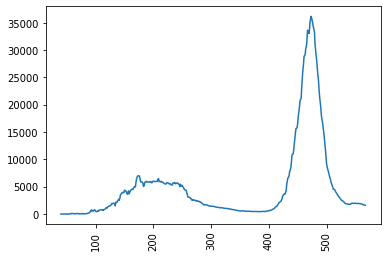

---------------------------------------------------------------------
Test for  TG
test_statistic : -3.364438727918303
p value : 0.012232564112920171
lags used : 14
number of observations used : 513
---------------------------------------------------
p value 0.012232564112920171
Reject h0
It is stationary
Weak evidence that the given data is not stationary


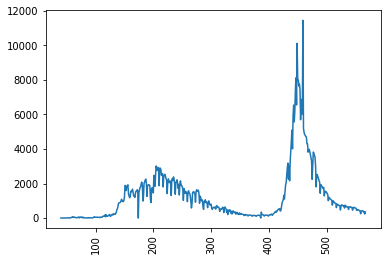

---------------------------------------------------------------------


In [102]:
#repeating adfuller test for the features which are not stationary.
for cols in non_stationary_cols:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(40)
    test=repeat_adfuller_test(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('---------------------------------------------------------------------')

In [122]:
#function to find the features that can be stationary after differencing
def repeat_adfuller_test_cols_finding(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    #for lab,val in zip(labels,results[:4]):
    #    print('{} : {}'.format(lab,val))
    #print('---------------------------------------------------')   
    #print('p value',results[1])
    if results[1]<=0.05:
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    #else:
        #print('Accecpt h0')
        #print(h0)
        #print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)
    if len(cols_after_differencing)>0:
        print(cols_after_differencing)

In [121]:
#calling the function by iterating the shitf value from 0 to 100.
for i in range(0,100):
    #repeating adfuller test for the features which are not stationary.
    print('i: ',i)
    for cols in non_stationary_cols:
        #print('Test for ',cols)
        data=data_frame.copy()
        data[cols]=data[cols].shift(i)
        test=repeat_adfuller_test_cols_finding(data[cols].dropna())
        #data[cols].plot()
        #plt.xticks(rotation=90)
        #plt.show()
        #print('---------------------------------------------------------------------')
    #print(test)

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
['AN']
i:  8
['AN']
['TG']
i:  9
['AN']
['TG']
i:  10
['AN']
['TG']
i:  11
['AN']
['TG']
i:  12
['AN']
['TG']
i:  13
['AN']
['TG']
i:  14
['AN']
['TG']
i:  15
['AN']
['TG']
i:  16
['AN']
['TG']
i:  17
['AN']
['TG']
i:  18
['AN']
['TG']
i:  19
['AN']
['TG']
i:  20
['AN']
['TG']
i:  21
['AN']
['TG']
i:  22
['AN']
['TG']
i:  23
['AN']
['TG']
i:  24
['AN']
['TG']
i:  25
['AN']
['TG']
i:  26
['AN']
['TG']
i:  27
['AN']
['TG']
i:  28
['AN']
['TG']
i:  29
['AN']
['TG']
i:  30
['AN']
['TG']
i:  31
['AN']
['TG']
i:  32
['AN']
['CH']
['TG']
i:  33
['AN']
['CH']
['TG']
i:  34
['AN']
['CH']
['TG']
i:  35
['AN']
['CH']
['TG']
i:  36
['AN']
['TG']
i:  37
['AN']
['TG']
i:  38
['AN']
['TG']
i:  39
['AN']
['TG']
i:  40
['AN']
['TG']
i:  41
['AN']
['TG']
i:  42
['AN']
['CH']
['TG']
i:  43
['AN']
['CH']
['TG']
i:  44
['AN']
['CH']
['TG']
i:  45
['AN']
['CH']
['TG']
i:  46
['AN']
['CH']
['TG']
i:  47
['AN']
['CH']
['MZ']
['TG']
i:  48
['AN']
['CH']
['TG']
i:

In [133]:
#function for the cols that are transformed to stationary data after differencing
def repeat_adfuller_test_cols_transformed(data):
    cols_after_differencing=[]
    results=adfuller(data)
    h0='It is not stationary'
    h1='It is stationary'
    labels=['test_statistic','p value','lags used','number of observations used']
    
    if results[1]<=0.05:
        for lab,val in zip(labels,results[:4]):
            print('{} : {}'.format(lab,val))
        print('---------------------------------------------------')   
        print('p value',results[1])
        print('Reject h0')
        print(h1)
        print('Weak evidence that the given data is not stationary')
        cols_after_differencing.append(data.name)
        #stationary_cols.append(data.name)
    #else:
        #print('Accecpt h0')
        #print(h0)
        #print('Strong evidence that the given data is not stationary')
        #non_stationary_cols.append(data.name)

Test for  AN
test_statistic : -3.865425203423562
p value : 0.0023045581748534533
lags used : 13
number of observations used : 483
---------------------------------------------------
p value 0.0023045581748534533
Reject h0
It is stationary
Weak evidence that the given data is not stationary


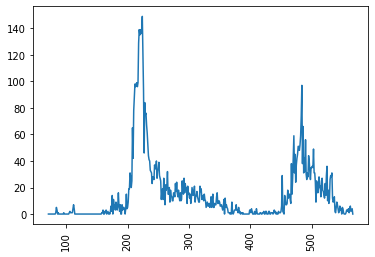

Plotting autocorrelation and partial autocorrelation for  AN


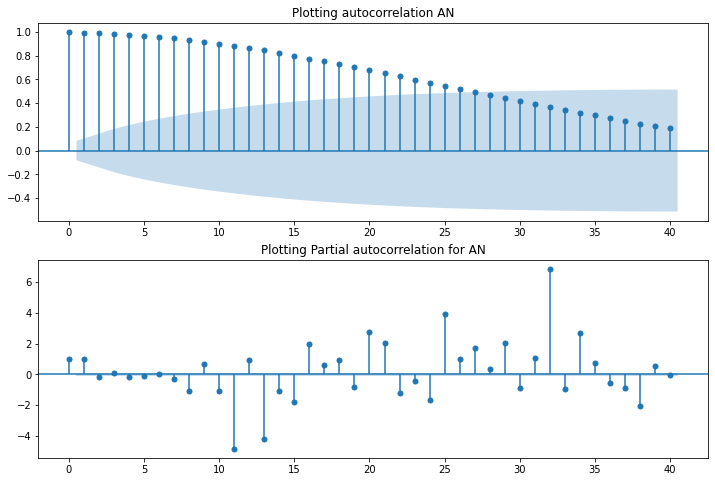

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  CH
test_statistic : -3.04094207876597
p value : 0.031243818646664666
lags used : 18
number of observations used : 478
---------------------------------------------------
p value 0.031243818646664666
Reject h0
It is stationary
Weak evidence that the given data is not stationary


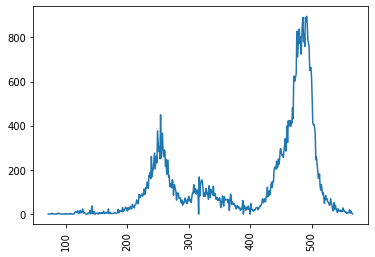

Plotting autocorrelation and partial autocorrelation for  CH


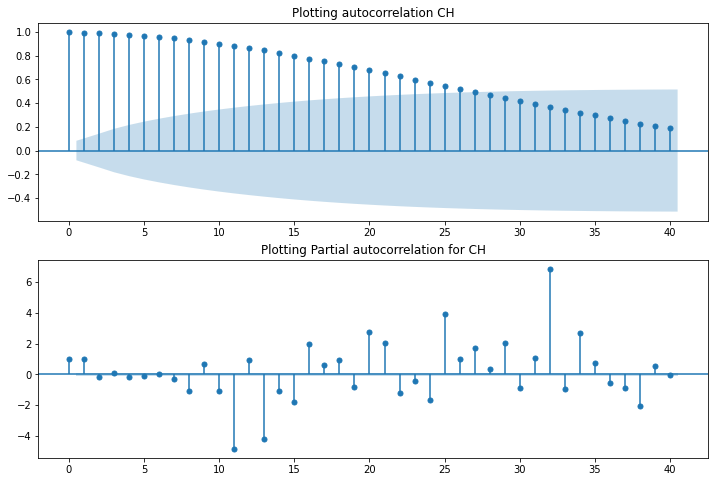

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  HR
test_statistic : -3.1550814308453528
p value : 0.022736469675005304
lags used : 13
number of observations used : 483
---------------------------------------------------
p value 0.022736469675005304
Reject h0
It is stationary
Weak evidence that the given data is not stationary


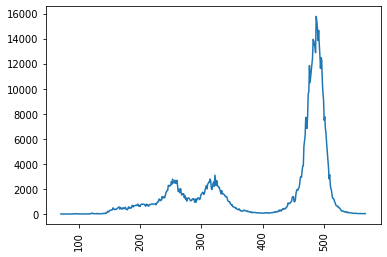

Plotting autocorrelation and partial autocorrelation for  HR


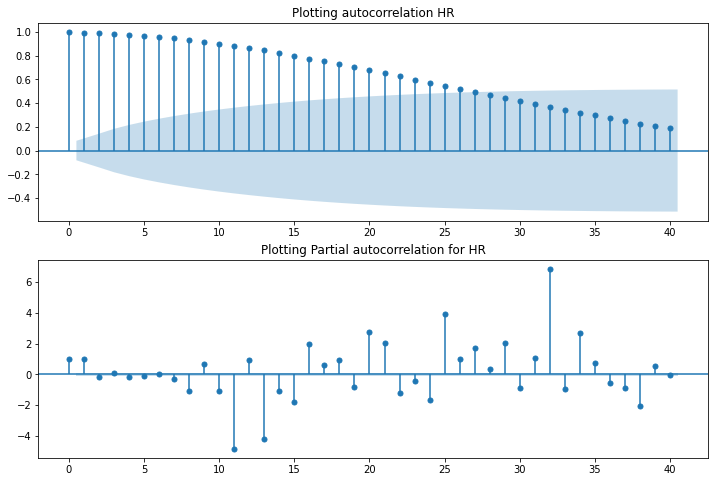

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
Test for  TG
test_statistic : -3.3032702186843275
p value : 0.014732926962397913
lags used : 14
number of observations used : 482
---------------------------------------------------
p value 0.014732926962397913
Reject h0
It is stationary
Weak evidence that the given data is not stationary


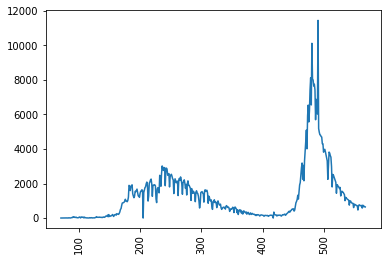

Plotting autocorrelation and partial autocorrelation for  TG


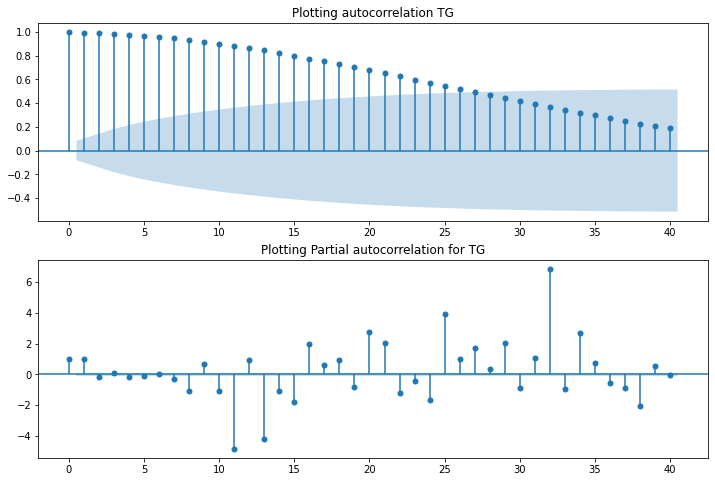

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------


In [139]:
for cols in ['AN','CH','HR','TG']:
    print('Test for ',cols)
    data=data_frame.copy()
    data[cols]=data[cols].shift(71)
    test=repeat_adfuller_test_cols_transformed(data[cols].dropna())
    data[cols].plot()
    plt.xticks(rotation=90)
    plt.show()
    print('Plotting autocorrelation and partial autocorrelation for ',cols)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data_frame['TT'],lags=40,ax=ax1,title='Plotting autocorrelation '+cols)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data_frame['TT'],lags=40,ax=ax2,title='Plotting Partial autocorrelation for '+cols)
    plt.show()
    print('-----------------------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------------------')